In [5]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('pro3_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        668111 non-null  int64  
 1   회원상태        668111 non-null  object 
 2   구매수량        668111 non-null  float64
 3   구매금액        668111 non-null  int64  
 4   주문일시        668111 non-null  object 
 5   배송시작일       637476 non-null  object 
 6   배송완료일       637476 non-null  object 
 7   사용 적립금      668111 non-null  int64  
 8   사용 포인트 네이버  668111 non-null  int64  
 9   주문취소여부      668111 non-null  object 
 10  제품번호        668111 non-null  object 
 11  주문시간        668111 non-null  object 
 12  주문시_구분      668111 non-null  object 
 13  주문시간_DT     668111 non-null  object 
 14  물품명         668111 non-null  object 
 15  물품대분류       668111 non-null  object 
 16  물품중분류       668111 non-null  object 
 17  식품여부        668111 non-null  object 
 18  배달보관방식      668111 non-null  object 
 19  재분

In [9]:
df['수도권여부'].value_counts()

수도권여부
지방     562274
수도권    105837
Name: count, dtype: int64

In [11]:
df['배송완료일'].value_counts()

배송완료일
2022-02-20    4034
2022-09-28    3936
2022-02-21    3606
2022-09-29    3573
2022-09-27    3189
              ... 
2022-10-02     144
2022-02-24     105
2022-11-09      97
2022-11-10      20
2022-11-11       2
Name: count, Length: 308, dtype: int64

t-statistic: -0.10935711939662218, p-value: 0.9129193983970176


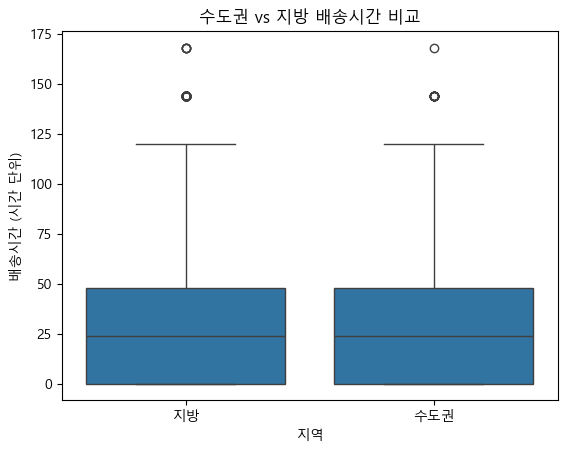

In [17]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt

# 데이터 로드
# data = pd.read_csv('your_data.csv')  # 데이터를 적절히 로드하세요

# 0. '주문취소여부' 변수가 '주문취소'인 데이터를 모두 지워줌
data = data[data['주문취소여부'] != '주문취소']

# 1. 수도권여부를 기준으로 데이터를 2개로 나눔 ('지방', '수도권')
local_data = data[data['수도권여부'] == '지방']
metro_data = data[data['수도권여부'] == '수도권']

# 2. '배송완료일'과 '주문일시'로부터 '배송시간' 변수를 생성 (다양한 날짜 형식을 처리)
def compute_delivery_time(df):
    # 날짜 형식 변환
    df['주문일시'] = pd.to_datetime(df['주문일시'], format='%Y-%m-%d', errors='coerce')  # %Y-%m-%d 형식에 맞게 변환
    df['배송완료일'] = pd.to_datetime(df['배송완료일'], format='%Y-%m-%d', errors='coerce')  # %Y-%m-%d 형식에 맞게 변환
    
    # '배송시간' 계산
    df['배송시간'] = (df['배송완료일'] - df['주문일시']).dt.total_seconds() / 3600.0  # 시간 단위로 계산
    return df

local_data = compute_delivery_time(local_data)
metro_data = compute_delivery_time(metro_data)

# 3. 수도권과 비수도권의 배송시간 차이를 t검정하고 박스플롯으로 그리기
# t-검정을 위해 두 그룹의 '배송시간' 값을 준비
local_delivery_time = local_data['배송시간'].dropna()
metro_delivery_time = metro_data['배송시간'].dropna()

# t-검정 수행
t_stat, p_value = stats.ttest_ind(local_delivery_time, metro_delivery_time, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# 박스플롯 그리기
combined_data = pd.concat([local_data[['수도권여부', '배송시간']], metro_data[['수도권여부', '배송시간']]])
sns.boxplot(x='수도권여부', y='배송시간', data=combined_data)
plt.title('수도권 vs 지방 배송시간 비교')
plt.xlabel('지역')
plt.ylabel('배송시간 (시간 단위)')
plt.show()


In [25]:
local_data['수도권여부'].value_counts()

수도권여부
지방    536608
Name: count, dtype: int64

In [38]:
len(local_data['구독여부'] == '구독')

536608

In [ ]:
len(local_data['구독여부'] == '구독')

In [40]:
local_data['구독여부'].value_counts()

구독여부
False    458394
True      78214
Name: count, dtype: int64

In [42]:
metro_data['구독여부'].value_counts()

구독여부
False    86996
True     13872
Name: count, dtype: int64

In [32]:
local_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536608 entries, 1 to 668110
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   회원번호        536608 non-null  int64         
 1   회원상태        536608 non-null  object        
 2   구매수량        536608 non-null  float64       
 3   구매금액        536608 non-null  int64         
 4   주문일시        536608 non-null  datetime64[ns]
 5   배송시작일       536608 non-null  object        
 6   배송완료일       536608 non-null  datetime64[ns]
 7   사용 적립금      536608 non-null  int64         
 8   사용 포인트 네이버  536608 non-null  int64         
 9   주문취소여부      536608 non-null  object        
 10  제품번호        536608 non-null  object        
 11  주문시간        536608 non-null  object        
 12  주문시_구분      536608 non-null  object        
 13  주문시간_DT     536608 non-null  object        
 14  물품명         536608 non-null  object        
 15  물품대분류       536608 non-null  object        
 16  물품중분류  

In [27]:
df['주문취소여부'].value_counts()

주문취소여부
배송완료    637476
주문취소     30635
Name: count, dtype: int64

In [44]:
df['휴면여부'].value_counts()

휴면여부
활성고객    638880
단기휴면     18881
장기휴면     10350
Name: count, dtype: int64

ANOVA 결과: F-통계량=8.553042860927501, p-값=0.0001929781924463324
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
  단기휴면   장기휴면  1032.7943 0.6235 -1579.6578 3645.2464  False
  단기휴면   활성고객 -1831.6378 0.0178 -3408.9624 -254.3132   True
  장기휴면   활성고객 -2864.4321 0.0043 -4980.9826 -747.8816   True
-----------------------------------------------------------


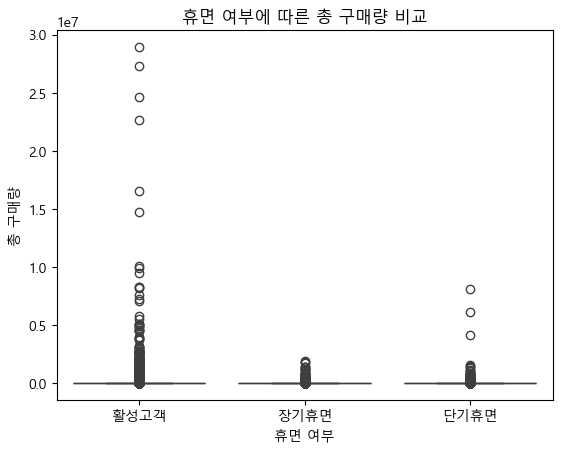

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 데이터 로드
data = pd.read_csv('pro3_data.csv')  # 데이터를 적절히 로드하세요

# 1. 총 구매량 변수 계산
data['총 구매량'] = data['구매수량'] * data['구매금액']

# 2. 휴면 여부에 따라 데이터를 나누고 ANOVA 테스트 수행
# 휴면 여부 값: 활성고객, 단기휴면, 장기휴면

# 각 그룹별 총 구매량 데이터 추출
active_customers = data[data['휴면여부'] == '활성고객']['총 구매량']
short_term_dormant = data[data['휴면여부'] == '단기휴면']['총 구매량']
long_term_dormant = data[data['휴면여부'] == '장기휴면']['총 구매량']

# ANOVA 테스트 수행
anova_result = stats.f_oneway(active_customers, short_term_dormant, long_term_dormant)
print(f'ANOVA 결과: F-통계량={anova_result.statistic}, p-값={anova_result.pvalue}')

# 3. Tukey HSD 테스트를 통한 사후 검정
# 모든 데이터를 한 데이터프레임으로 결합
combined_data = pd.concat([data[['휴면여부', '총 구매량']]])

# Tukey HSD 검정 수행
tukey_result = pairwise_tukeyhsd(endog=combined_data['총 구매량'], groups=combined_data['휴면여부'], alpha=0.05)
print(tukey_result)

# 4. Box-plot을 통해 시각적으로 표현
sns.boxplot(x="휴면여부", y="총 구매량", data=combined_data)
plt.title('휴면 여부에 따른 총 구매량 비교')
plt.xlabel('휴면 여부')
plt.ylabel('총 구매량')
plt.show()


In [50]:
df['구독여부'].value_counts()

구독여부
False    571570
True      96541
Name: count, dtype: int64

In [52]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터 로드
data = pd.read_csv('pro3_data.csv')  # 데이터를 적절히 로드하세요

# 구독 여부와 휴면 여부 변수의 값 확인
# 구독 여부가 True, False인 경우와 휴면 여부가 '활성고객', '단기휴면', '장기휴면'인 경우

# 2. 크로스테이블 생성
cross_tab = pd.crosstab(data['구독여부'], data['휴면여부'])
print("구독 여부와 휴면 여부 간의 크로스테이블:\n", cross_tab)

# 3. Chi-squared 테스트 수행
chi2_stat, p_value, dof, expected = chi2_contingency(cross_tab)
print("\nChi-squared 테스트 결과:")
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}, degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)


구독 여부와 휴면 여부 간의 크로스테이블:
 휴면여부    단기휴면  장기휴면    활성고객
구독여부                      
False  15927  8409  547234
True    2954  1941   91646

Chi-squared 테스트 결과:
Chi-squared statistic: 182.61367027325431, p-value: 2.217917257293399e-40, degrees of freedom: 2
Expected frequencies:
 [[ 16152.72487655   8854.44110335 546562.8340201 ]
 [  2728.27512345   1495.55889665  92317.1659799 ]]


In [54]:
import pandas as pd

# 데이터 로드
# data = pd.read_csv('your_data.csv')  # 데이터를 적절히 로드하세요

# 1. '단기휴면'인 고객 데이터 필터링
short_term_dormant_data = data[data['휴면여부'] == '단기휴면']

# 2. 각 고객의 가장 최근 구매를 찾기 위해 주문 일시 기준으로 정렬하고, 고객별로 가장 최근 구매 선택
# '주문일시' 컬럼이 datetime형식이 아닌 경우 변환
short_term_dormant_data['주문일시'] = pd.to_datetime(short_term_dormant_data['주문일시'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 고객별로 가장 최근 구매 데이터 선택
most_recent_purchases = short_term_dormant_data.sort_values(by='주문일시').groupby('회원번호').tail(1)

# 3. '물품중분류' 카운트
item_subcategories_count = most_recent_purchases['물품중분류'].value_counts()
print("단기휴면 고객들의 가장 최근에 산 제품의 '물품중분류' 카운트 결과:\n", item_subcategories_count)


단기휴면 고객들의 가장 최근에 산 제품의 '물품중분류' 카운트 결과:
 물품중분류
두부         161
스낵         126
콩나물         67
과즙          62
논지엠오유정란     42
          ... 
솔부추          1
토종           1
밤            1
발아미          1
조림           1
Name: count, Length: 230, dtype: int64


In [56]:
import pandas as pd

# 데이터 로드
# data = pd.read_csv('your_data.csv')  # 데이터를 적절히 로드하세요

# 1. '장기휴면'인 고객 데이터 필터링
long_term_dormant_data = data[data['휴면여부'] == '장기휴면']

# 2. 각 고객의 가장 최근 구매를 찾기 위해 주문 일시 기준으로 정렬하고, 고객별로 가장 최근 구매 선택
# '주문일시' 컬럼이 datetime형식이 아닌 경우 변환
long_term_dormant_data['주문일시'] = pd.to_datetime(long_term_dormant_data['주문일시'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 고객별로 가장 최근 구매 데이터 선택
most_recent_purchases = long_term_dormant_data.sort_values(by='주문일시').groupby('회원번호').tail(1)

# 3. '물품중분류' 카운트
item_subcategories_count = most_recent_purchases['물품중분류'].value_counts()
print("장기휴면 고객들의 가장 최근에 산 제품의 '물품중분류' 카운트 결과:\n", item_subcategories_count)


장기휴면 고객들의 가장 최근에 산 제품의 '물품중분류' 카운트 결과:
 물품중분류
두부        191
스낵        123
콩나물        81
과즙         66
추출/농축액     37
         ... 
단감          1
적양배추        1
삶은무시래기      1
잎마늘         1
냉이          1
Name: count, Length: 230, dtype: int64


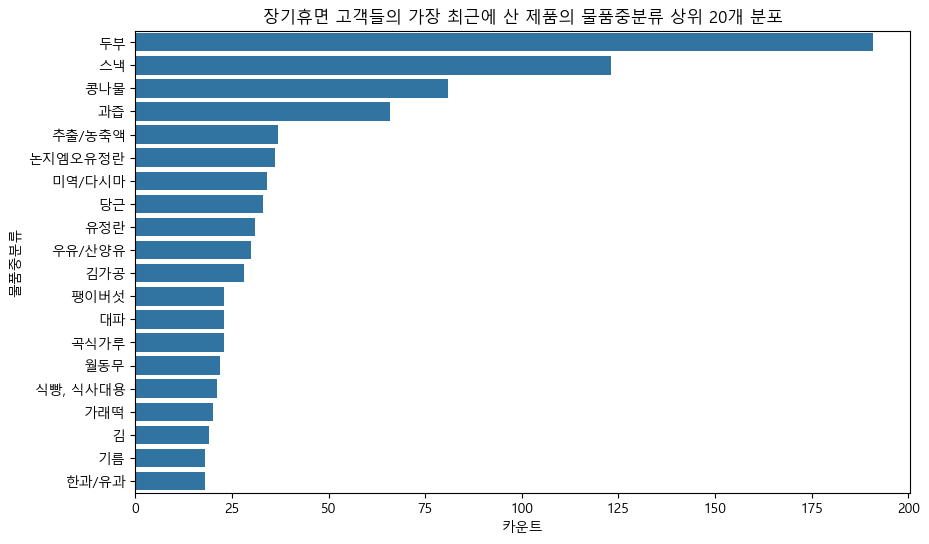

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
# data = pd.read_csv('your_data.csv')  # 데이터를 적절히 로드하세요

# 1. '장기휴면'인 고객 데이터 필터링
long_term_dormant_data = data[data['휴면여부'] == '장기휴면']

# 2. 각 고객의 가장 최근 구매를 찾기 위해 주문 일시 기준으로 정렬하고, 고객별로 가장 최근 구매 선택
# '주문일시' 컬럼이 datetime 형식이 아닌 경우 변환
long_term_dormant_data['주문일시'] = pd.to_datetime(long_term_dormant_data['주문일시'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 고객별로 가장 최근 구매 데이터 선택
most_recent_purchases = long_term_dormant_data.sort_values(by='주문일시').groupby('회원번호').tail(1)

# 3. '물품중분류' 카운트
item_subcategories_count = most_recent_purchases['물품중분류'].value_counts()

# 4. 상위 20개 항목 선택
top_20_item_subcategories = item_subcategories_count.head(20)

# 5. 막대그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_item_subcategories.values, y=top_20_item_subcategories.index, orient='h')
plt.title('장기휴면 고객들의 가장 최근에 산 제품의 물품중분류 상위 20개 분포')
plt.xlabel('카운트')
plt.ylabel('물품중분류')
plt.show()


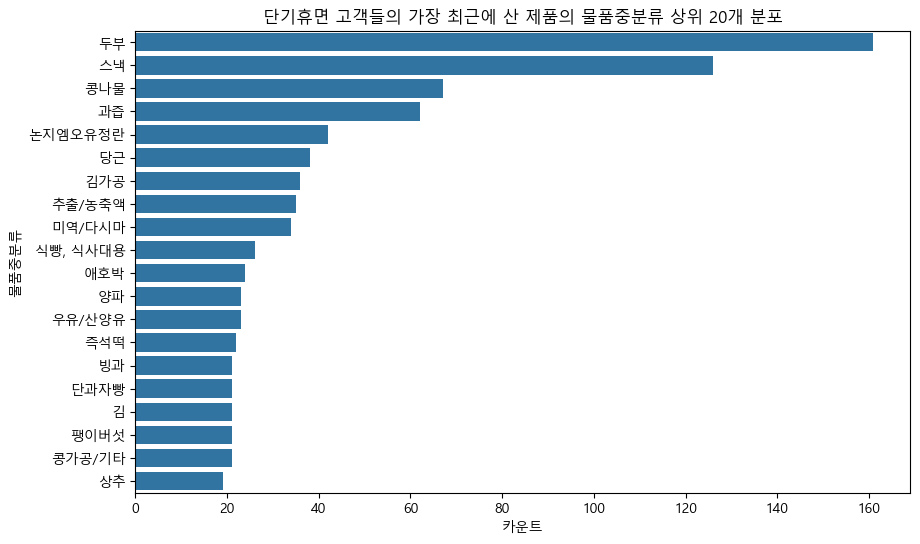

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
# data = pd.read_csv('your_data.csv')  # 데이터를 적절히 로드하세요

# 1. '단기휴면'인 고객 데이터 필터링
short_term_dormant_data = data[data['휴면여부'] == '단기휴면']

# 2. 각 고객의 가장 최근 구매를 찾기 위해 주문 일시 기준으로 정렬하고, 고객별로 가장 최근 구매 선택
# '주문일시' 컬럼이 datetime 형식이 아닌 경우 변환
short_term_dormant_data['주문일시'] = pd.to_datetime(short_term_dormant_data['주문일시'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 고객별로 가장 최근 구매 데이터 선택
most_recent_purchases = short_term_dormant_data.sort_values(by='주문일시').groupby('회원번호').tail(1)

# 3. '물품중분류' 카운트
item_subcategories_count = most_recent_purchases['물품중분류'].value_counts()

# 4. 상위 20개 항목 선택
top_20_item_subcategories = item_subcategories_count.head(20)

# 5. 막대그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_item_subcategories.values, y=top_20_item_subcategories.index, orient='h')
plt.title('단기휴면 고객들의 가장 최근에 산 제품의 물품중분류 상위 20개 분포')
plt.xlabel('카운트')
plt.ylabel('물품중분류')
plt.show()
